<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Spin-States,-Operators-and-Expectation-values" data-toc-modified-id="Spin-States,-Operators-and-Expectation-values-2">Spin States, Operators and Expectation values</a></span></li><li><span><a href="#Plotting-on-the-Bloch-Sphere" data-toc-modified-id="Plotting-on-the-Bloch-Sphere-3">Plotting on the Bloch Sphere</a></span></li><li><span><a href="#Spin-1/2-Particle-in-a-Magnetic-Field" data-toc-modified-id="Spin-1/2-Particle-in-a-Magnetic-Field-4">Spin-1/2 Particle in a Magnetic Field</a></span><ul class="toc-item"><li><span><a href="#Static-magnetic-field" data-toc-modified-id="Static-magnetic-field-4.1"><em>Static</em> magnetic field</a></span></li><li><span><a href="#Oscillating-magnetic-field" data-toc-modified-id="Oscillating-magnetic-field-4.2"><em>Oscillating</em> magnetic field</a></span></li></ul></li><li><span><a href="#Magnetic-Resonance-of-a-Proton" data-toc-modified-id="Magnetic-Resonance-of-a-Proton-5">Magnetic Resonance of a Proton</a></span><ul class="toc-item"><li><span><a href="#Rabi-oscillations" data-toc-modified-id="Rabi-oscillations-5.1">Rabi oscillations</a></span></li><li><span><a href="#Single-spin-flip-simulation" data-toc-modified-id="Single-spin-flip-simulation-5.2">Single spin flip simulation</a></span></li><li><span><a href="#Double-spin-flip-simulation" data-toc-modified-id="Double-spin-flip-simulation-5.3">Double spin flip simulation</a></span></li></ul></li><li><span><a href="#Test-Initial-Conditions" data-toc-modified-id="Test-Initial-Conditions-6">Test Initial Conditions</a></span></li></ul></div>

# PROJECT: Modeling Magnetic Resonance using QuTiP

**Maastricht Science Programme, Project Period January 2022**

## Introduction
**Magnetic resonance** can be observed in rotating charged particles (exhibiting magnetic dipole), which are set in an external magnetic field consisting of a static and an oscillating components.
**NMR** is a subtype of magnetic resonnace, where the phenomenon typically applies to re-orientation of a nucleus in an applied magnetic field. **Spin-1/2 particle**, such as a proton, is said to be a two-level particle as it can be found in two different spin states, spin-up or spin-down.

The aim of this notebook is to explain and simulate a simple **model of magnetic resonance of a proton.**


###### **Literature resources:**
-  Mark Beck. “Quantum mechanics : theory and experiment”. In: (2012). ISBN: 9780199798230. URL:http://site.ebrary.com/id/10578493. (especially chapters 9.4 and 9A.1)
- [QuTiP: Quantum Toolbox in Python - documentation](https://qutip.org/docs/latest/index.html)
- Report

Start by importing necessary libraries:

In [35]:
import qutip as qt
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt 
import math, cmath

from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from qutip.ipynbtools import version_table

%matplotlib inline

## Spin States, Operators and Expectation values

Generally, a quantum system at any point in time can be described by a quantum state, which is a ket vector $\left|\psi\right>$.

If $\left|\psi\right>$ is measured in the z-direction, spin-1/2 particle can be found eiher in spin-up state $\left|+z\right>=\left|0\right>$ or spin-down state $\left|-z\right>=\left|1\right>$.


Performing a measurement on the z-component of a spin, $S_z$, is equivalent to numerically applying a Hermitian operator, $\hat{S}_z$, which results in finding expectation values with eigenvalues $\pm\frac{\hbar}{2}$ (the same goes for x and y components):


\begin{align}
    \hat{S}_z \left|+z\right> &= \frac{\hbar}{2} \left|+z\right>\ 
    \;\;\; , \;\;\;\;\;
    \hat{S}_z \left|-z\right> = \frac{\hbar}{2} \left|-z\right>\
\end{align}


Since spin states can be represented as row or column vectors, $\hat{S}_z$ has the following matrix representation


\begin{align}
    \hat{S}_z &= \frac{\hbar}{2} 
    \begin{pmatrix}
           1 \;\;\; 0 \\
           0 \; -\!1 \\
         \end{pmatrix} = \frac{\hbar}{2}\sigma_z
\end{align}


where $\sigma_z$ is one of the 3 Pauli matrices, which form the basis of the operator space.

In the following code we will be using $\hbar = 1$, and Pauli matrices will be applied as qutip methods: `sigmax()`, `sigmay()`, `sigmaz()`.

Knowing this, we can define spin-1/2 states and operators:

In [36]:
#Spin states
pz = qt.Qobj([[1],[0]]) # +z
mz = qt.Qobj([[0],[1]]) # -z

#Pauli matrices
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

#Expectation values - observable spin components
Sx = 1/2.0 * qt.sigmax()
Sy = 1/2.0 * qt.sigmay()
Sz = 1/2.0 * qt.sigmaz()

## Plotting on the Bloch Sphere
QuTiP module comes with an useful graphical representation of quantum states, the Bloch sphere (with normalized axes), which will be the main tool for visualizing our model. 
Source code for `Bloch()` can be found [here](https://qutip.org/docs/4.0.2/modules/qutip/bloch.html), and can be used to look for and understand specific methods that are not mentioned much in documentation (like `add_state()`).

QuTiP ocumentation: __[guide-bloch](https://qutip.org/docs/latest/guide/guide-bloch.html)__

The following code shows the basics of plotting quantum states, points and vectors on the Bloch sphere.

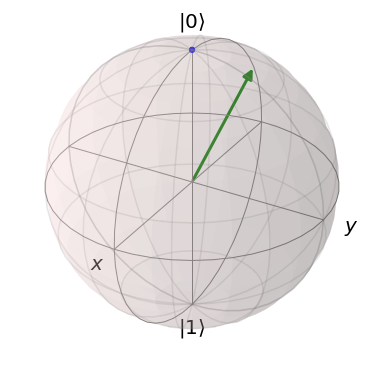

In [37]:
b = qt.Bloch() #create a Bloch sphere

#plotting a single state:
st1 = qt.Qobj(1/2*np.array([np.sqrt(3),-1])) #input [a,b]
b.add_states(st1) #transforms state into Bloch representation -> calculates angles to plot on sphere

#plotting a single point
north_pole = [0,0,1]
b.add_points(north_pole)

b.render() #render figure

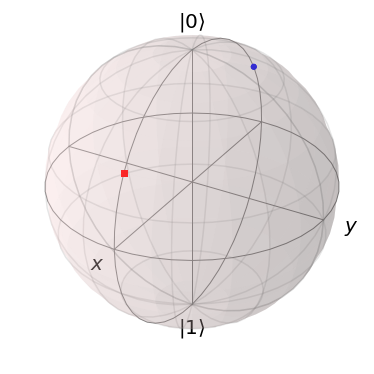

In [38]:
b.clear() #clear figure

#plotting two or more different states:
st_arr = [qt.Qobj(1/2*np.array([np.sqrt(3),-1])), qt.Qobj(1/2*np.array([-np.sqrt(3),-1]))] #array of quantum states
b.add_states(st_arr, kind='point') #you can also plot it as points by changing kind (kind='point' or 'vector')

b.render()

Using these methods, spin states $\left|+z\right>$ and $\left|-z\right>$ can be easily represented on the Bloch sphere. Since $\left|0\right>$ and $\left|1\right>$ notations are equivalent and common and a default in qutip, we will be using those throughout the rest of this notebook.

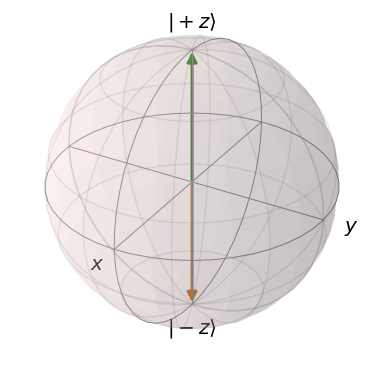

In [39]:
b = qt.Bloch()

b.add_states([pz, mz], kind='vector')
b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']

b.render()

## Spin-1/2 Particle in a Magnetic Field

As stated in the introduction, to achieve magnetic resonance, magnetic field must contain two different component. 
Let's start by modeling how a static component affects our quantum system.

### *Static* magnetic field

Particle of spin 1/2 begins at rest at an angle $\alpha$ in a uniform magnetic field pointing in the z-axis $B_z$.

Spin state, defined by $a$ and $b$, is determined by the initial conditions, and evolves over specified time period by the following:


\begin{align}
    \chi(t) &= \begin{bmatrix}
           a(t) \\
           b(t) \\
         \end{bmatrix}
         = \begin{bmatrix}
           cos(\frac{\alpha}{2})e^{i\gamma B_z t/2} \\
           sin(\frac{\alpha}{2})e^{-i\gamma B_z t/2} \\
         \end{bmatrix}
\end{align}


In [40]:
#INITIAL CONDITIONS
gamma = 1 # gyromagnetic ratio
Bz = 1 # magnetic field strength
alpha = np.pi/6 # angle of precession -> determines the states (can also do the opposite)
t = np.arange(0, 2*math.pi, 0.1) #time period in seconds

**Solving manually**

Following the equation above, we can simply calculate state evolution over time, and represent it on a Bloch sphere, with a green vector as a starting state:

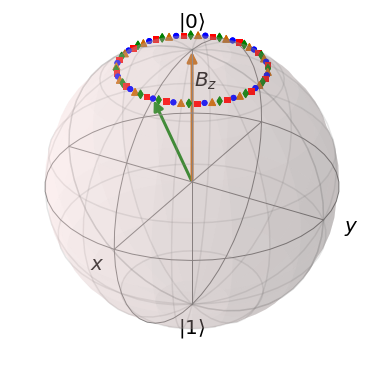

In [41]:
#BLOCH SPHERE REPRESENTATION OF TIME EVOLUTION
b = qt.Bloch()

xi_0 = qt.Qobj([[math.cos(alpha/2)], [math.sin(alpha/2)]])
xi_t = [qt.Qobj(np.array([math.cos(alpha/2)*cmath.exp(1j*gamma*Bz*time/2),math.sin(alpha/2)*cmath.exp(-1j*gamma*Bz*time/2)])) for time in t]

b.add_states(xi_0, kind='vector')
b.add_states(xi_t, kind='point')
b.add_vectors([0,0,1]) # magnetic field
b.add_annotation([0,0.1,0.8],'$B_z$')

b.render()

We can see that in a static magnetic field a proton will precess around the magnetic field axis at a constant angle. The frequency of precession is called the Larmor frequency and is defined as $\Omega = \gamma B_z$.

**QuTiP solver**

QuTiP allows for automatic computation of time evolution using function `sesolve()` and a defined Hamiltonian operator.
In this case, our Hamiltonian is time-independent and defined by gyromagnetic ratio $\gamma$, operator $\hat{S}_z$ and magnetic field strength $B_z$ as:


\begin{align}
    \hat{H} &= -\gamma \hat{S}_z B_z = -\Omega \hat{S}_z
\end{align}

In [42]:
#Hamiltonian
H = -gamma*Sz*Bz

#starting state
psi0 = qt.Qobj(np.array([math.cos(alpha/2),math.sin(alpha/2)]))

#time evolution
result = qt.sesolve(H, psi0, t, [sx,sy,sz])

To extract expectation values of time evolution, we can use `result.expect`, since attribute `expect` in `result` is a list of expectation values for the operators that are included in the list in the 4th argument. Extracted values can then be used to visualize time evolution of state.

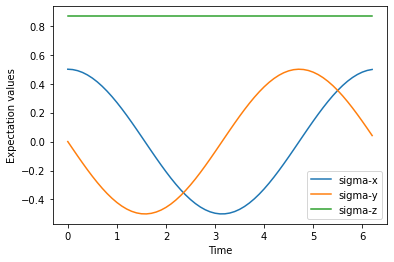

In [43]:
x, y, z = result.expect

#VISUALIZATION of state evolution
fig, ax = plt.subplots()
ax.plot(result.times, x);
ax.plot(result.times, y);
ax.plot(result.times, z);
ax.set_xlabel('Time');
ax.set_ylabel('Expectation values'); 
ax.legend(("sigma-x", "sigma-y", "sigma-z"));
plt.show()

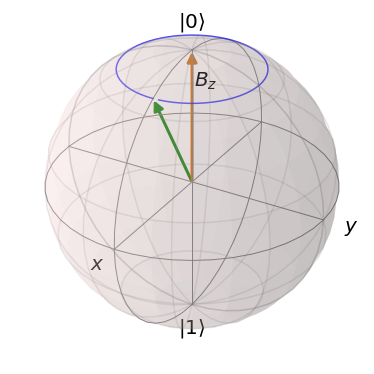

In [44]:
#BLOCH SPHERE VISUALIZATION
b = qt.Bloch()
b.add_points([x, y, z], 'l') #'m', 's' or 'l'
b.add_states(psi0, kind='vector')

#OR
#st_vec = [[x[i], y[i], z[i]] for i in range(len(x))]
#b.add_vectors(st_vec)

b.add_vectors([0,0,1]) # magnetic field
b.add_annotation([0,0.1,0.8],'$B_z$')
b.render()

We can see that resulting graphics display the same trajectory, and in this simple example easily interchangable. When faced with more challenging probems on the other hand, qutip methods are much more efficient, where `sesolve()` employs time-independent Schrödinger equation:

\begin{align}
    i\hbar \frac{d}{dt}\left|\psi\right> &= H\left|\psi\right>
\end{align}

Detailed description of the solver can be found [here](https://qutip.org/docs/4.0.2/guide/dynamics/dynamics-master.html#unitary-evolution) under unitary evolution as we are working with a closed quantum system (a single proton in a magnetic field).

### *Oscillating* magnetic field

Next, let us model time evolution of a proton when placed in an one-directional oscillating magnetic field: 

\begin{align}
    \overrightarrow{B} = B_x cos(\omega t) \overrightarrow{u_x}
\end{align}

Now, that we have verified qutip methods, we can take advantage of qutip methods to derive state evolution.

**QuTiP solver**

To use qutip solver `seslove()`, one must again first define the Hamiltonian, which is in this case time-dependant and additionaly determined by the oscillation frequency $\omega$:

\begin{align}
    H = -\gamma B_z cos(\omega t) \hat S_z
\end{align}

Its use is therefore trickier and must follow [this](https://qutip.org/docs/4.0.2/guide/dynamics/dynamics-time.html). Time-dependant term must be contained within a Python function that returns a coefficient, which is then paired with a given Hamiltonian in a specified operator-function pair in list format: `[H, H_coeff]`.

In [45]:
#INITIAL CONDITIONS
gamma = 1000 #42.6 * 2 * np.pi #gyromagnetic ratio
w = 1 #oscillation frequency in s-1
Bz = np.pi*w/gamma #strength needed to make a full spin state flip
omega = gamma * Bz # Larmor frequency

#initial state
psi0 = pz #spin-up

#Hamiltonian
def H_coeff(t, args):
    return np.cos(w*t)
H = [-omega * Sx, H_coeff]

times = np.arange(0, np.pi/2, 0.1) #time in sec
 
result = qt.sesolve(H, psi0, times, [sx, sy, sz]) #evolve in time
x, y, z = result.expect #extract expectation values

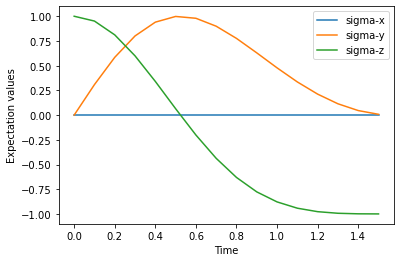

In [46]:
#VISUALIZATION of state evolution
fig, ax = plt.subplots()
ax.plot(result.times, x);
ax.plot(result.times, y);
ax.plot(result.times, z);
ax.set_xlabel('Time');
ax.set_ylabel('Expectation values'); 
ax.legend(("sigma-x", "sigma-y", "sigma-z"));
plt.show()

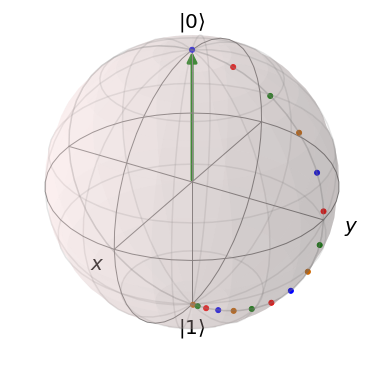

In [47]:
#Plot on Bloch sphere
b = qt.Bloch()
b.add_points([x,y,z], 'm')
b.add_states(psi0, kind='vector')

b.render()

## Magnetic Resonance of a Proton

To achieve magnetic resonance, a few conditions must be satisfied:

- Static and oscillating component must be applied to a particle at the same time. Magnetic field strength is therefore:

\begin{align*}
    B &=  B_zu_z + B_x cos(\omega t)u_x\\
\end{align*}

> Consenquently Hamiltonian operator consists of time-independant and time-dependant parts:

\begin{align*}
    \hat H &= -\gamma \hat{S}_z B_z - \gamma \hat S_x B_x \cos(\omega t)\\
           &= -\Omega_0 \hat{S}_z - \Omega_1 \hat{S}_x \cos(\omega t)
\end{align*}

> where $\Omega_0=\gamma B_z$ and  $\Omega_1=\gamma B_x$ are Larmor frequencies.

- Frequency of the oscillating component must be equal to the first Larmor frequency:

\begin{align}
    \omega = \Omega_0
\end{align}

- Static magnetic field must be of high magnitude, and $B_z >> B_x$.

At this point it is also convenient to create a new function, which we will call `magResonance()`, that can be used later. This way, we can observed state evolution determined by different initial conditions. To have the particle's magnetic moment already aligned with the static magnetic field, the spin-up was the initial state of our choice. However, initial state could also be different, resulting in various time evolutions. Even though by definition the conditions of magnetic resonance are satisfied, a spin state flip is not guaranted. You can test this by defining the value of angle `alpha` and replacing `psi0` with `psi_alpha` in the last line of this block. 

In [48]:
#INITIAL CONDITIONS
#arbitrarily chosen values
gamma = 1000 #proton Gyromagnetic ratio (my value but *10**6 --> would need many tiny steps)
Bz = 1     #static mag field strength in z-axis
Bx = 10e-6   #oscillating mag field strength in x-axis
t = np.arange(0.0, 1000, 0.2) #arbitrary choice for time
psi0 = pz #initial state

alpha = np.pi # CHOOSE STARTING ANGLE
psi_alpha = qt.Qobj(np.array([math.cos(alpha),math.sin(alpha)]))
    
#STATE TIME EVOLUTION FUNCTION
def magResonance(gamma, Bz, Bx, t, psi0):
    #Larmor frequencies
    omega0 = gamma*Bz
    omega1 = gamma*Bx

    #frequency of oscillating field
    w = omega0 # this determines if resonance happens (w = Omega0)

    #Hamiltonian
    def H_coeff(t, args):
        return np.cos(w*t)
    H = [-omega0 * Sz, [-omega1 * Sx, H_coeff]]

    #Evolve in time & extract expectation values
    result = qt.sesolve(H, psi0, t, [sx, sy, sz])
    exp0, exp1, exp2 = result.expect
    return exp0, exp1, exp2, H

x, y, z, H = magResonance(gamma, Bz, Bx, t, psi0)

Due to solver's necessity of having small enough time intervals, we just generated a large number of points. Plotting them all (try it by setting `n=1`) results in a meaningless visualization. Therefore, it makes sense to plot only every $n$-th point, which displays more insightful graphics. Try adjusting `n` and `style` variables to arrive to different visual results.

Hint: Combination `n=6` and `style='l'` gives a good result.

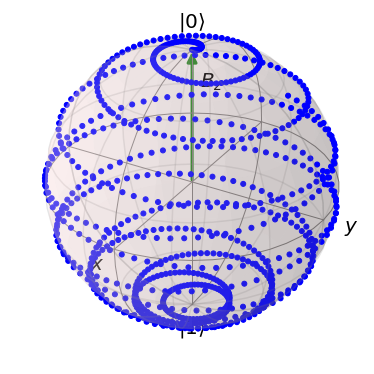

In [49]:
n = 6 #takes every nth value
style = 's' #use 'l', 'm' or 's'

#Plot on Bloch Sphere
b = qt.Bloch()
expt_arr = [x[::n], y[::n], z[::n]] 
b.add_points(expt_arr, style) 
Bz_vec = [0,0,1]
b.add_vectors(Bz_vec)
b.add_annotation([0,0.15,0.8],'$B_z$')
b.render()

### Rabi oscillations

State evolution, which we plot on the Bloch sphere, is linked to the probability that the particle will be measured in any state of interest. Since we model magnetic resonance, where a proton switches its spin state from spin-up $\left|0\right>$ at $t= 0$ to spin-down $\left|1\right>$, we are interested in probability of measuring the proton in $\left|1\right>$ at any point in time, which follows: 

\begin{align}
    P_{0\rightarrow1}(t) = |\left< 1 | \psi(t) \right>|^2
\end{align}

With the `sesolve()`, we can specify various different operators and in the following code we used $\left|-z\right>$ projection operator `mz*mz.dag()`. It's expectation value is $P(\left|-z\right>,t)$, which we extract using `result.expect`.

In [50]:
result = qt.sesolve(H, psi0, t, [mz*mz.dag()])
Pmz = result.expect[0]

If we plot these probabilities (for a certain state) over time we can observe so-called Rabi oscillations or Rabi cycle. In our case spin state oscillates between $\left|0\right>$ and $\left|1\right>$. The maximum probability $P_{max}$ therefore represents a spin flip and is theoretically described by Rabi's formula:

\begin{align*}
    P_{0\rightarrow1}(t) &=  P_{max}(\omega)\frac{1}{2}[1-\cos(\Omega_R t)]
\end{align*}

where $\Omega_R$ is the Rabi frequency, which determines oscillation of the $P_{max}$:

\begin{align*}
    \Omega_R &=  \sqrt{(\omega-\Omega_0)^2+(\Omega_1/2)^2}
\end{align*}

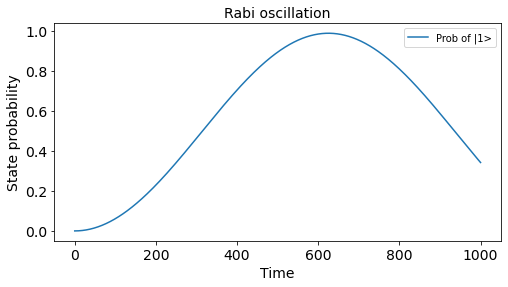

In [51]:
#Plot oscillation of P(-z,t)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(result.times, Pmz, label="Prob of |1>")
ax.legend()
ax.set_xlabel('Time', size=14)
plt.tick_params(labelsize=14)
ax.set_ylabel('State probability', size=14)
ax.set_title('Rabi oscillation', size=14);

If $\omega=\Omega_0$, magnetic resonance is achieved, and $P_{max} = 1$.
To simulate a single state flip with 100% chance, we thus need to apply an oscillating magnetic field with an oscillation frequency $\omega=\Omega_0$ for a time $t=\pi/\Omega_R$. A pulse of this duration is reffered to as a $\pi$-pulse, because $\Omega_Rt=\pi$.

Let's now calculate $\Omega_R$ and a $\pi$-pulse to improve our visualization:

In [52]:
#Rabi frequency - because w = omega0, only omega1/2 is useful
omega0 = gamma*Bz
omega1 = gamma*Bx
w = omega0

omegaR = np.sqrt((w - omega0)**2 + (omega1/2.0)**2) 

t_rabi = np.pi/omegaR #time for a half Rabi cycle = one flip

print("Time at which flip probability is 100%: " + str(t_rabi))

Time at which flip probability is 100%: 628.3185307179587


We can now used the found time value to adjust the time period in our time evolution solver and plot the results:

In [53]:
t = np.arange(0.0, t_rabi, 0.2) #pi-pulse in seconds

result = qt.sesolve(H, psi0, t, [sx, sy, sz, mz*mz.dag()])

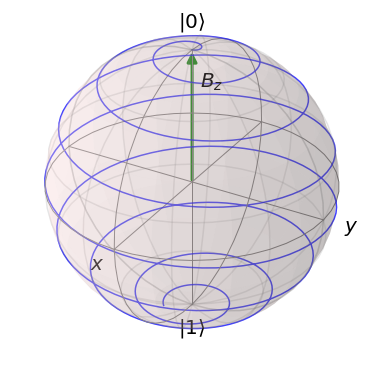

In [54]:
x, y, z, Pmz = result.expect

#Plot on Bloch Sphere
n = 6 #takes every n-th value - ##all multiples of 60 work well for the shape
expt_arr = [x[::n], y[::n], z[::n]]  

b = qt.Bloch()
b.add_points(expt_arr, 'l')
b.add_vectors(Bz_vec)
b.add_annotation([0,0.15,0.8],'$B_z$')
b.render()

The Bloch sphere above does not show the state to go fully to the $\left|1\right>$ state because of the number of points skipped in the plotting, which a certain amount of aliasing.

Next is the plot of the Rabi oscillations for half a cycle, displaying the probabilities of measuring spin-up state $\left|0\right>$ and spin-down state $\left|1\right>$. The latter can be simply calculated by $1-P(\left|0\right>)$.

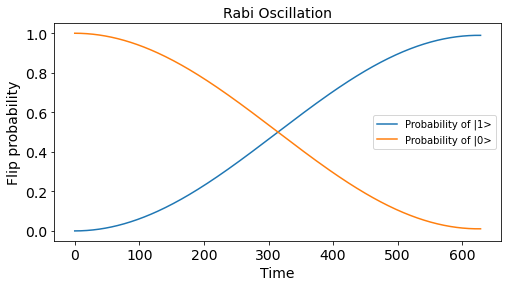

In [55]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(t, Pmz, label="Probability of |1>")
ax.plot(t, 1-Pmz, label="Probability of |0>")
ax.set_xlabel('Time', size=14)
ax.set_ylabel('Flip probability', size=14)
ax.tick_params(labelsize=14)
ax.set_title('Rabi Oscillation', size=14)
ax.legend();

If we calculate flip probability using the Rabi formula, we get the same result.

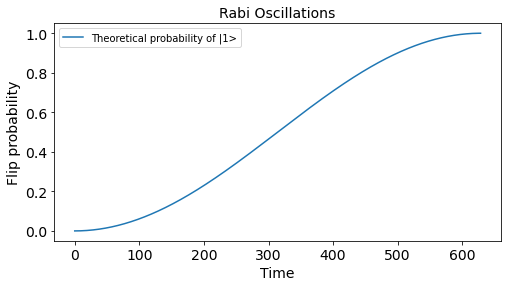

In [56]:
fp = 0.5*(1-np.cos(omegaR*t)) #flip probability using Rabi formula

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, fp, label="Theoretical probability of |1>")
ax.set_xlabel('Time', size=14)
ax.set_ylabel('Flip probability', size=14)
ax.tick_params(labelsize=14)
ax.set_title('Rabi Oscillations', size=14)
ax.legend();

### Single spin flip simulation

To simulate a single spin flip on a Bloch sphere we first define our initial condition, where you can play with changing the variables. We then let the system evolve in accordance with requirements that result in magnetic resonance.
Lastly, we can animate our state evolution using `animation.FuncAnimation()`, which sequentially calls pre-defined `animate(i)` that determines the animation. This approach was adapted from [QuTiP documentation.](https://qutip.org/docs/latest/guide/guide-bloch.html#animating-with-the-bloch-sphere)

In [57]:
#INITIAL CONDITIONS
#arbitrarily chosen values
gamma = 1000        #proton Gyromagnetic ratio (real value much larger -> would require many time steps)
Bz = 1              #static mag field strength in z-axis
Bz_vec = [0,0,1]    #static magnetic field vector
Bx = 10e-6          #oscillating mag field strength in x-axis
psi0 = pz           #initial state (spin-up)

In [58]:
t = np.arange(0.0, t_rabi, 0.02) #pi-pulse in seconds

x, y, z, H = magResonance(gamma, Bz, Bx, t, psi0)

In [ ]:
n = 60 #takes every n-th value - ##all multiples of 60 work well for the shape
exp0 = x[::n]
exp1 = y[::n]
exp2 = z[::n]

#First set up the figure, the axis, and the plot element we want to animate
fig1 = plt.figure()
ax = Axes3D(fig1, azim=-40, elev=30, auto_add_to_figure=False)
fig1.add_axes(ax)
b = qt.Bloch(axes=ax)

#Animation function (called sequentially)
def animate(i): #generates new image each iteration
    b.clear()
    vector = [[exp0[i], exp1[i], exp2[i]]] #new vector added where new point appears
    b.add_vectors(vector)
    b.add_points([exp0[:i+1], exp1[:i+1], exp2[:i+1]],'l') #new point added
    b.add_vectors(Bz_vec)
    b.vector_color = ['r','g']
    b.add_annotation([0,0.15,0.8],'$B_z$')
    b.make_sphere()
    return ax

#Initialization function: plot the background of each frame
def init(): #keep vectors same color
    return ax

#Animate and save 
ani1 = animation.FuncAnimation(fig1, animate, init_func=init, repeat=False, save_count=len(exp0))

ani1.save('bloch_sphere_1Flip.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

In [ ]:
#Display animation (works in browser version of JN only)
display.Video("bloch_sphere_1Flip.mp4")

### Double spin flip simulation

To see a full Rabi oscillation, we need to double the time that we had previously:

In [ ]:
t = np.arange(0.0, 2*t_rabi, 0.02) #2*pi-pulse in seconds

#Evolve in time & extract expectation values
result = qt.sesolve(H, psi0, t, [sx, sy, sz])
x, y, z = result.expect

In [ ]:
n = 180 #takes every n-th value - ##all multiples of 60 work well for the shape

exp0 = x[::n]
exp1 = y[::n]
exp2 = z[::n]

#First set up the figure, the axis, and the plot element we want to animate
fig2 = plt.figure()
ax = Axes3D(fig2, azim=-40, elev=30, auto_add_to_figure=False)
fig2.add_axes(ax)
b = qt.Bloch(axes=ax)

#Animate
ani2 = animation.FuncAnimation(fig2, animate, init_func=init, repeat=False, save_count=len(exp0))

ani2.save('bloch_sphere_2Flips.mp4', fps=20, extra_args=['-vcodec', 'libx264']) #(saving as mp4 requires ffmpeg)

In [ ]:
#Display animation (works in browser version of JN only)
display.Video("bloch_sphere_2Flips.mp4")

## Test Initial Conditions

Lastly, we can compare evolution of states based on different initial conditions. Changing the following parameters results in different outcomes. You can plot two state evolutions at magnetic resonance next to each other for easy comparison. Adjusting the number of points being plotted (n) might also be neccesary to obtain a meaningful plot. Be aware that significant increases of values, particularly $\gamma$, $B_z$ and the number of time steps might drastically increase the code's execution time.

When observing the figures, note that the red point represents a starting state, whereas the green point is the state at the end of time evolution. Have fun! :)

In [ ]:
#INITIAL CONDITIONS
t = np.arange(0.0, 500, 0.1) #time

#Bloch1
gamma = 1000     #proton Gyromagnetic ratio (my value but *10**6 --> would need many tiny steps)
Bz = 1           #static mag field strength in z-axis
Bz_vec = [0,0,1] #static magnetic field vector
Bx = 10e-6       #oscillating mag field strength in x-axis
psi0 = pz        #initial state (spin-up)

x1, y1, z1, H = magResonance(gamma, Bz, Bx, t, psi0)

#Bloch2
gamma = 1000     #proton Gyromagnetic ratio (my value but *10**6 --> would need many tiny steps)
Bz = 1           #static mag field strength in z-axis
Bz_vec = [0,0,1] #static magnetic field vector
Bx = 10e-6       #oscillating mag field strength in x-axis
psi0 = qt.Qobj(1/2*np.array([np.sqrt(3),-1])) #initial state (spin-up)

x2, y2, z2, H = magResonance(gamma, Bz, Bx, t, psi0)

In [ ]:
#ADJUST n1/n2 TO PRODUCE A MEANINGFUL PLOT
n1 = 60
n2 = 60
#Create points to plot
states1 = [x1[::n1], y1[::n1], z1[::n1]]
states2 = [x2[::n2], y2[::n2], z2[::n2]]

In [ ]:
#Plot on Bloch spheres
fig = plt.figure(figsize=(12 ,5));

rec1 = [0, 0, 0.5, 1]
rec2 = [0.5, 0, 0.5, 1]
rec3 = [0., 0.9, 1, 0.1]

ax1 = Axes3D(fig, rec1, azim=-60, elev=30, auto_add_to_figure=False)
fig.add_axes(ax1)
ax2 = Axes3D(fig, rec2, azim=-60, elev=30, auto_add_to_figure=False)
fig.add_axes(ax2)
ax3 = fig.add_axes(rec3)
ax3.axis ("off")
ax3.text(0.05, 0, r"$1)$", fontsize=20);
ax3.text (0.55 ,0 , r"$2)$", fontsize=20);

b1 = qt.Bloch(axes=ax1)
b1.add_points(states1, 'l')
b1.add_vectors(Bz_vec)
b1.add_points([x1[0],y1[0],z1[0]])
f1 = len(states1[0])-1 #??
b1.add_points([states1[0][f1],states1[1][f1],states1[2][f1]])  #why not correct?
b1.add_annotation([0, 0.15, 0.8], '$B_z$')
b1.make_sphere()

b2 = qt.Bloch(axes=ax2)
b2.add_points(states2, 'l')
b2.add_vectors(Bz_vec)
b2.add_points([x2[0],y2[0],z2[0]])
f2 = len(states2[0])-1
b2.add_points([states2[0][f2],states2[1][f2],states2[2][f2]])
b2.add_annotation([0, 0.15, 0.8], '$B_z$')
b2.make_sphere()

*Congrats! You made it through the end.*

In [ ]:
version_table()